# Ford GoBike System Data

## by (Amr Saeed)


## Preliminary Wrangling

> This data set of information about individual rides made in a bike-sharing system from the greater San Francisco Bay area. this dataset consist of 183412 trip,db image taken @2019

In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [45]:
df = pd.read_csv('201902-fordgobike-tripdata.csv') #reading data

In [46]:
df.shape

(183412, 16)

In [47]:
df = df.dropna() #drop null

In [48]:
df.shape

(174952, 16)

In [49]:
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   
5          1793  2019-02-28 23:49:58.6320  2019-03-01 00:19:51.7600   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes  
5          Male                      No

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [51]:
#changing data type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_name = df['start_station_name'].astype(str)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [53]:
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   
5              93.0                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   
5               37.770407              -122.391198           323.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   
5            -122.405950     5200  Subscriber             1959.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes  
5          Male                      No

In [54]:
index_names = df[ df['member_gender'] == "Other" ].index
df.drop(index_names, inplace = True)

In [55]:
df.member_gender.value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [56]:
df['member_age'] = 2022 - df['member_birth_year']

In [57]:
data=df
data['duration_min'] = data['duration_sec']/60

### What is the structure of your dataset?

> the structure of data has 16 features and 183412 trip those are
(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).
### I had  
#### 1- drop null vlaues 
#### 2- scaling duration in seconds to duration in minutes 
#### 3- dropping [other] type of gender for simplecity
#### 4- scaling [member_birth_year] feature to [member_age]

### What is/are the main feature(s) of interest in your dataset?

> duration of the trip is the main feature interest with thw aid of other features

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

####  1- start time
####  2- member age
####  3- gender
### i am intersted in 
#### 1- fitching out peak time of trips daily 
#### 2- the most frequent user ages 
#### 3- the destination takes the peak trip duration


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## The following figure shows the frequency distribution of flight times in minutes 


(array([1.70907e+05, 2.13000e+02, 6.10000e+01, 2.80000e+01, 2.10000e+01,
        1.90000e+01, 1.90000e+01, 1.90000e+01, 1.20000e+01, 6.00000e+00]),
 array([1.01666667e+00, 1.41828333e+02, 2.82640000e+02, 4.23451667e+02,
        5.64263333e+02, 7.05075000e+02, 8.45886667e+02, 9.86698333e+02,
        1.12751000e+03, 1.26832167e+03, 1.40913333e+03]),
 <BarContainer object of 10 artists>)

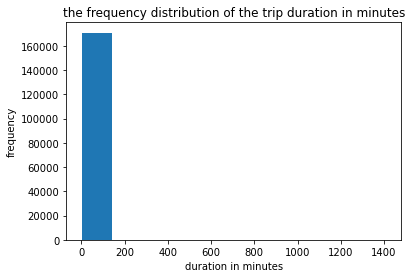

In [58]:
plt.xlabel('duration in minutes');
plt.ylabel('frequency');
plt.title('the frequency distribution of the trip duration in minutes');

plt.hist(data = df, x= "duration_min")

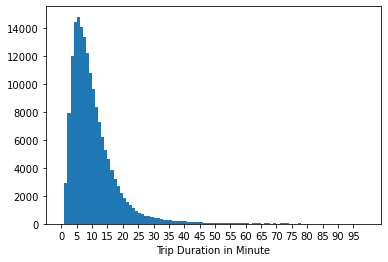

In [59]:
bins = np.arange(0, 100, 1)
ticks = np.arange(0, 100, 5)
plt.hist(data=data, x='duration_min', bins=bins);
plt.xticks(ticks, ticks);
plt.xlabel('Trip Duration in Minute');

### as we see the first plot is not clear enough to fitch the most tripes duration distribution so I took the duration only to the range of 100 minute to provide better clearance

## conclusion 
#### the most trips are between 5 to 15 minutes (as the normal distribution centered) and shown above

## plotting top 60 start trip distinations

In [60]:
df.start_station_name.value_counts()

Market St at 10th St                                         3576
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3370
Berry St at 4th St                                           2910
Montgomery St BART Station (Market St at 2nd St)             2643
Powell St BART Station (Market St at 4th St)                 2576
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     6
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

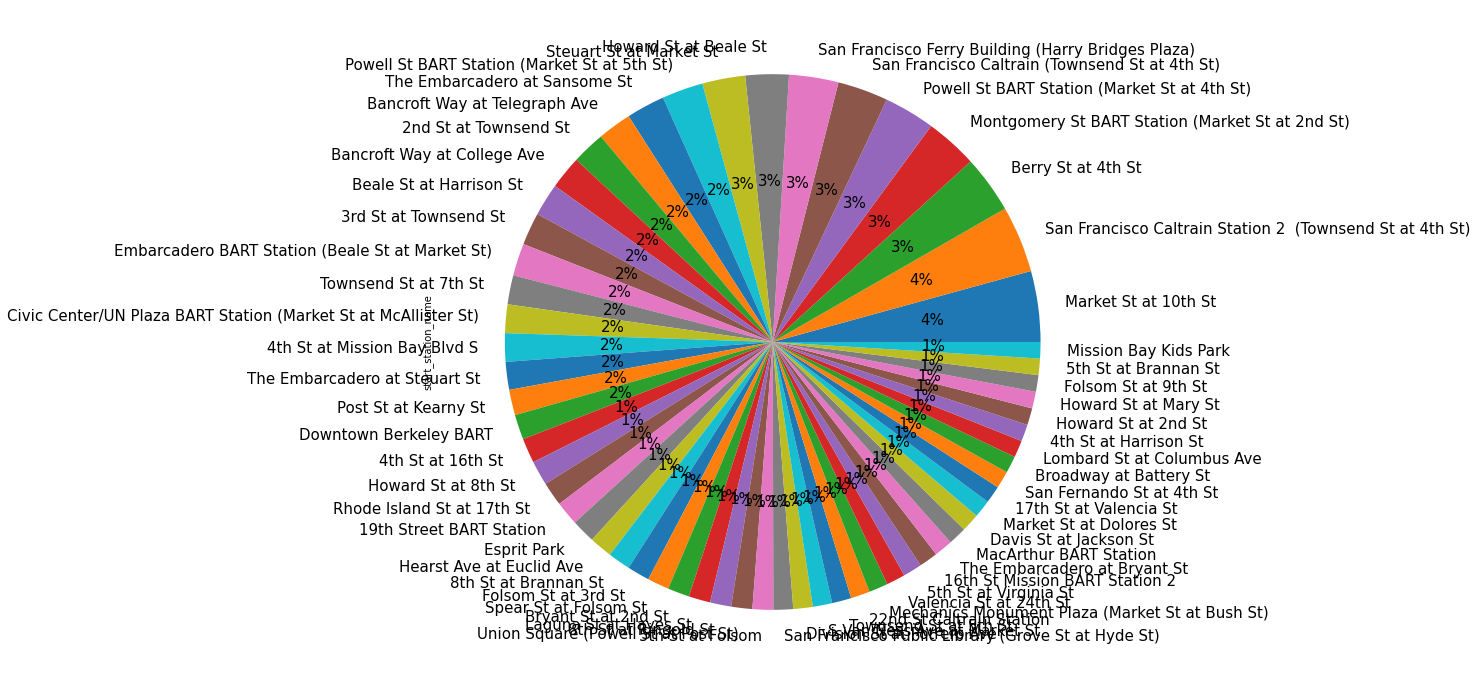

In [61]:
df.start_station_name.value_counts()[:60].plot.pie(figsize=(12,18), fontsize= 15, autopct='%.0f%%');

### the top distnation is ("market St") & ("san francisco Station 2") 

## I conclude that those two stations have the highest population so we need to provide more bikes 

## the most gender demanding for bikes 

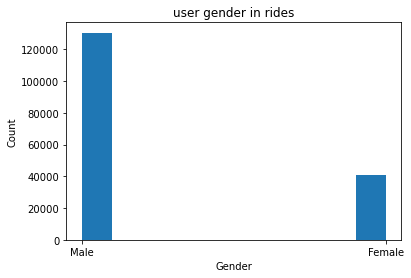

In [62]:
plt.hist(data= df , x = "member_gender")
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('user gender in rides');

### As shown in the figure Male are the most demanding users 

## plotting the start hour of the trip

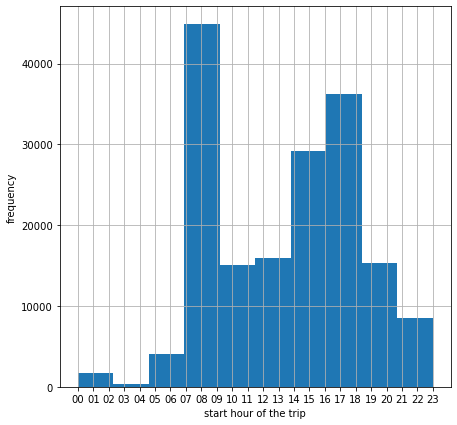

In [63]:
df.start_time.dt.strftime('%H').sort_values().hist(figsize=(7,7))
plt.xlabel('start hour of the trip');
plt.ylabel('frequency');

## The trip distribution over day hours peaks around two timeframes, 7am-9am and 4pm-6pm, during typical rush hours.

 

## fitching the major users ages

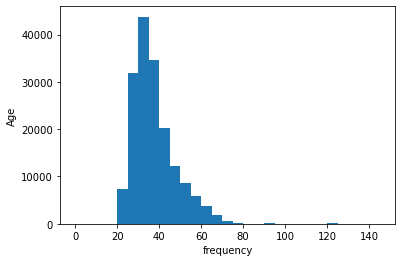

In [64]:
df['member_age'] = df['member_age'].astype('int')
bins = np.arange(0, data['member_age'].max()+5, 5)
plt.hist(data=df, x='member_age',bins=bins)
plt.xlabel('frequency');
plt.ylabel('Age');

### most members were around 20 to 40 years old as the figure above shown



> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> my main intrest is the trip duration, since the most of trips were around 100 minutes so I focused under the range of <100 minute and for sure transformed the data scale to minute since the second unit is not clear enough.

> the most of the trips were around 5:15 minutes 

> the rush our concluded by the frequency figures shows that the peak time were at the official work and study start-time & end-time

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the start station were 329 and the most dense were at the top only so I focused on the top 60 
> the cocluded data shows that the most users are males 
> As expected the users ages distribution shows the most were from 20:40 and this shows that workers are the major clients 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

# the most crowded station at rush hours

In [65]:
x = df.start_time.dt.strftime('%H').value_counts()[:6] #counts the rush hours only 
x

17    20497
08    19881
18    15785
09    14907
16    13196
07    10055
Name: start_time, dtype: int64

In [66]:
x = df.start_time.dt.strftime('%H').value_counts()[:6] # getting the rows with station name @start time only for rush hours
peak = df[ (df.start_time.dt.strftime('%H') == '17')|\
                              (df.start_time.dt.strftime('%H') == '08')|\
                              (df.start_time.dt.strftime('%H') == '18')|\
                              (df.start_time.dt.strftime('%H') == '09')|\
                              (df.start_time.dt.strftime('%H') == '16')|\
                              (df.start_time.dt.strftime('%H') == '07')][['start_station_name', 'start_time']]


In [67]:
peak.start_station_name.groupby(peak.start_time.dt.strftime('%H')).value_counts()

start_time  start_station_name                                       
07          San Francisco Caltrain Station 2  (Townsend St at 4th St)    397
            San Francisco Caltrain (Townsend St at 4th St)               241
            Howard St at Beale St                                        200
            Beale St at Harrison St                                      183
            San Francisco Ferry Building (Harry Bridges Plaza)           177
                                                                        ... 
18          Farnam St at Fruitvale Ave                                     1
            George St at 1st St                                            1
            Leavenworth St at Broadway                                     1
            San Pedro St at Hedding St                                     1
            Williams Ave at 3rd St                                         1
Name: start_station_name, Length: 1879, dtype: int64

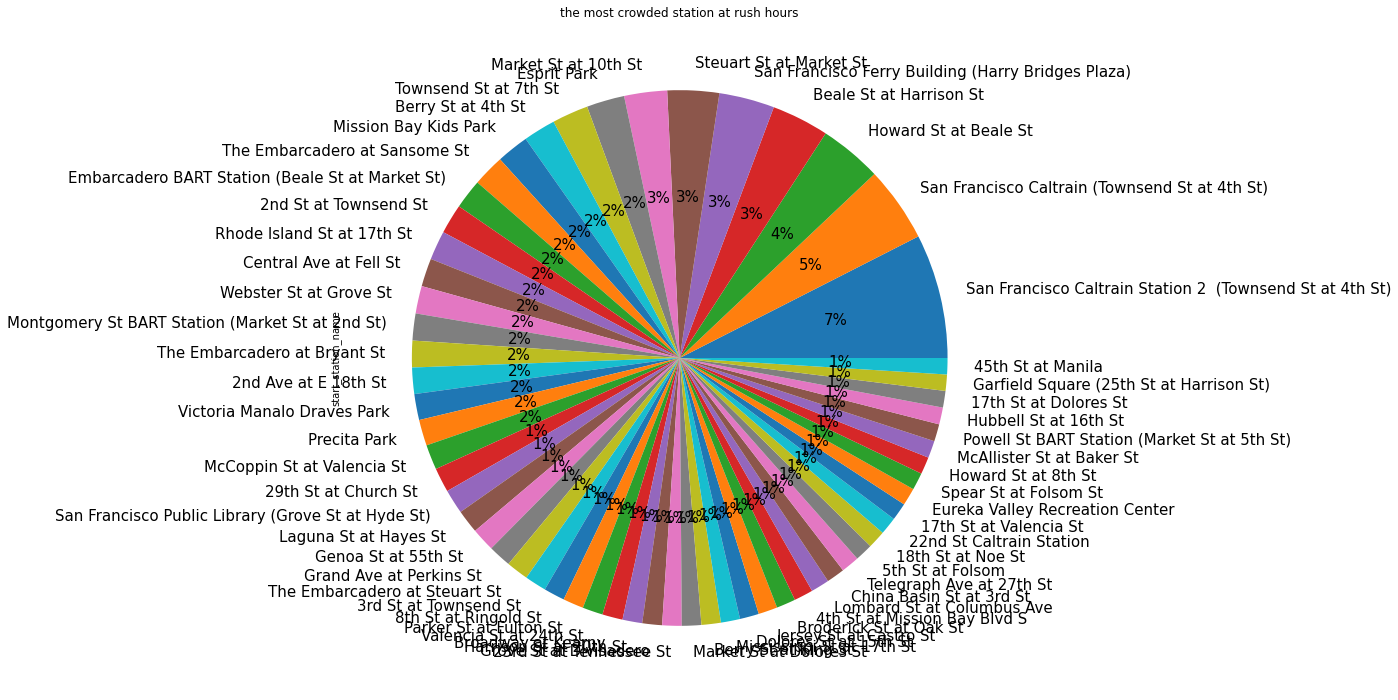

In [68]:
peak_time = peak[peak.start_time.dt.strftime('%H') == '07'].start_station_name.value_counts()

peak_time[:60].plot.pie(figsize=(12,18), fontsize= 15, autopct='%.0f%%' , 
                        title = 'the most crowded station at rush hours');

## As shown at the pie plot the ("market st") is not the most crowded station at rush hours but the both ("san francisco caltrain and caltrain station 2") are the most crowded
## with howard st at the third place

# trip duration according to each gender

(0.0, 2000.0)

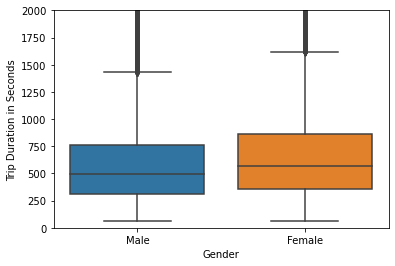

In [69]:
sb.boxplot(data=df, x='member_gender', y='duration_sec')
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Seconds');
plt.ylim([0, 2000])


> number male riders tend to have shorter trips compared to female users 

# which gender may allow to share his trip with other

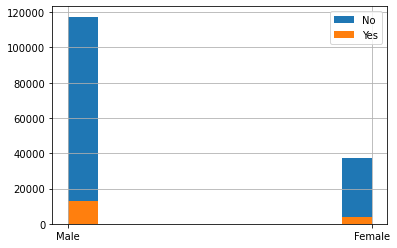

In [70]:
df.member_gender.groupby(df.bike_share_for_all_trip).hist()
plt.legend(['No','Yes'])


> the result shown is expected since male user tends to be more familiar with another user

In [71]:
day = df.start_time.dt.strftime('%A') #divide the start time in day unit

# average trip duration in week days

<AxesSubplot:xlabel='start_time', ylabel='duration_sec'>

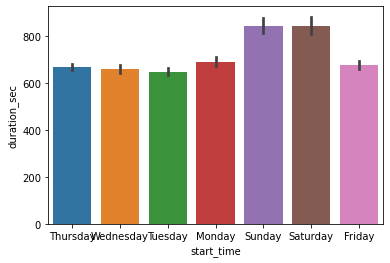

In [72]:
sb.barplot( x=day , y=df.duration_sec)

> The riding trips are much shorter on Monday through Friday compared to weekends. It indicates a pretty stable and efficient usage of the sharing system on normal work days, while more casual flexible use on weekends.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

##### > scale week days from start time 
##### > the trip duration is varing between week-days and week-ends it is much longer in week ends tends to be due to jamming
##### > the female tends to take longer rides (expected result)


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

##### >  Yes the most crowded stations changed according to rush hours since market st were placed top but it is san francisco caltrains 
##### >  the second conclusion that male user tends to share his trip 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [73]:
data = df #copy data 

# How does the trip duration distribution vary by age?


In [74]:
data.member_age.value_counts() #check the frequency of member age


34     10015
29      9145
33      8805
32      8495
31      8339
       ...  
102        3
78         2
88         2
95         1
144        1
Name: member_age, Length: 72, dtype: int64

In [75]:
# filter out outlier ages from visually examination of the count above
data = data.query('member_age <= 85')
# transforming the type of member age to integer
data['member_age'] = data['member_age'].astype('int')

<ipython-input-75-792b91a54179>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['member_age'] = data['member_age'].astype('int')


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171119 entries, 0 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171119 non-null  int64         
 1   start_time               171119 non-null  datetime64[ns]
 2   end_time                 171119 non-null  datetime64[ns]
 3   start_station_id         171119 non-null  float64       
 4   start_station_name       171119 non-null  object        
 5   start_station_latitude   171119 non-null  float64       
 6   start_station_longitude  171119 non-null  float64       
 7   end_station_id           171119 non-null  float64       
 8   end_station_name         171119 non-null  object        
 9   end_station_latitude     171119 non-null  float64       
 10  end_station_longitude    171119 non-null  float64       
 11  bike_id                  171119 non-null  int64         
 12  user_type       

In [77]:
# add new columns for trip duration in minute, trip start date in yyyy-mm-dd format,
# trip start hour of the day, day of week 
data['start_date'] = data.start_time.dt.strftime('%Y-%m-%d')
data['start_hour'] = data.start_time.dt.strftime('%H')
data['start_day'] = data.start_time.dt.strftime('%A')

<ipython-input-77-5c7b169d1f0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start_date'] = data.start_time.dt.strftime('%Y-%m-%d')
<ipython-input-77-5c7b169d1f0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['start_hour'] = data.start_time.dt.strftime('%H')
<ipython-input-77-5c7b169d1f0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171119 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171119 non-null  int64         
 1   start_time               171119 non-null  datetime64[ns]
 2   end_time                 171119 non-null  datetime64[ns]
 3   start_station_id         171119 non-null  float64       
 4   start_station_name       171119 non-null  object        
 5   start_station_latitude   171119 non-null  float64       
 6   start_station_longitude  171119 non-null  float64       
 7   end_station_id           171119 non-null  float64       
 8   end_station_name         171119 non-null  object        
 9   end_station_latitude     171119 non-null  float64       
 10  end_station_longitude    171119 non-null  float64       
 11  bike_id                  171119 non-null  int64         
 12  user_type       

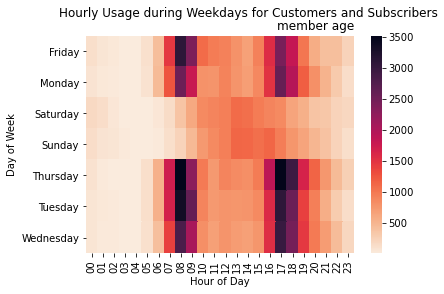

In [79]:
plt.suptitle('Hourly Usage during Weekdays for Customers and Subscribers')
customers = data.query('member_age < 45 & member_age > 20')
ct_counts = customers.groupby(['start_day', 'start_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='start_day', columns='start_hour', values='count')
sb.heatmap(ct_counts, cmap='rocket_r');
plt.title('member age', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

### stands on the univariate resultes active users grouped at 20:45 years-old 
## concluded that:
##### > 1- the week days are the working and collage days 
##### > 2- the day hours are working start & end hours of work 
##### > 3- that workers and collage students are the top clients 

# how does the trip duration vary between age and gender of riders ?


C:\Users\AlMO\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


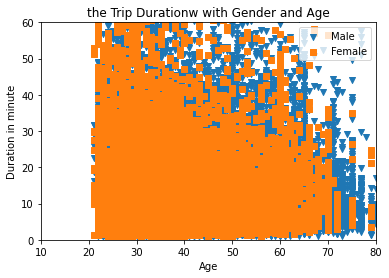

In [80]:
gender_mark = [['Male', 'v'],['Female', 's']]
for gender, marker in gender_mark:
    df_gender = data[data['member_gender'] == gender]
    plt.scatter(( df_gender['member_age']), df_gender['duration_min'], marker = marker, alpha= 1)
plt.legend(['Male','Female'])
plt.axis([10, 80, 0, 60])
plt.title('the Trip Durationw with Gender and Age')
plt.xlabel('Age')
plt.ylabel('Duration in minute')
plt.show()

### > from previous plot we get that the male users are usimg more rides while comparing with female and other with long durations , other types of customers are taking long rides while they are older (50 - 60)



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### >The multivariate exploration confirmed the previous explorations and figures.  
### >The rides are mainly concentrated on rush hours Monday through Friday, 
### indicates that workers and collage students are the top clients, 
### >The longest rides are in weekends due to jamming. 
### the number of users for male is higher but percentage is higher for women in trip duration.



### Were there any interesting or surprising interactions between features?

> the top crowded station at rush hours varing from the the crowded station during the day
and
> I conclude that people avoid crowds at peak times unless the trip is a working or study trip
This conclusion is very useful
Where the company will have to set a larger number of trips in specific places at rush times and different times in the rest of the day

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!